# Process bulk counts table

1. Annotate columns (samples) in a way that time point and replicate are annotated
2. Remove rRNA genes
3. Perform TPM normalization and alternatively also raw counts

In [1]:
# Use miniconda environment Jupyter_new for running this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tools import *
import warnings
warnings.filterwarnings('ignore')

## 1 Load the dataset and annotation

In [2]:
bulkPath = '../nf_output_Newman/countData/countData.tsv'
metaPath = '../Finstrlova_SraRunTable.csv' # metadata from SRA
gffPath = '../nf_output_Newman/alignments/dualGenome.gff3' # output from nf pipeline

In [3]:
# Load data
df_initial = pd.read_csv(bulkPath, sep = '\t', comment='#', index_col=0)
metadata = pd.read_csv(metaPath)
metadata = metadata[metadata['strain'] == 'Newman']

In [4]:
df_initial.head()

,Chr,Start,End,Strand,Length,SRR17196399_sorted.bam,SRR17196386_sorted.bam,SRR17196390_sorted.bam,SRR17196395_sorted.bam,SRR17196401_sorted.bam,...,SRR17196398_sorted.bam,SRR17196400_sorted.bam,SRR17196405_sorted.bam,SRR17196397_sorted.bam,SRR17196402_sorted.bam,SRR17196388_sorted.bam,SRR17196387_sorted.bam,SRR17196392_sorted.bam,SRR17196403_sorted.bam,SRR17196394_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS00005,NC_009641.1,517,1878,+,1362,881,1064,1818,805,377,...,405,269,283,524,378,1189,1346,1295,251,919
gene-NWMN_RS00010,NC_009641.1,2163,3296,+,1134,1091,1600,2074,1040,428,...,555,337,359,684,440,1396,1634,1527,323,1247
gene-NWMN_RS00015,NC_009641.1,3677,3922,+,246,214,287,384,279,112,...,150,131,89,271,127,440,263,312,116,315
gene-NWMN_RS00020,NC_009641.1,3919,5031,+,1113,942,965,1654,980,463,...,531,411,363,928,523,1674,828,1086,349,1258
gene-NWMN_RS00025,NC_009641.1,5041,6975,+,1935,1452,1028,2660,1798,832,...,969,870,737,1615,1084,3527,789,1883,830,2224


In [5]:
metadata

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,time
21,SRR17196386,RNA-Seq,76,778687868,PRJNA787900,SAMN23849059,322484616,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726909,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,before infection
22,SRR17196387,RNA-Seq,76,907009080,PRJNA787900,SAMN23849060,376622653,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:13:00Z,1,GSM5726910,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,before infection
23,SRR17196388,RNA-Seq,76,958096812,PRJNA787900,SAMN23849061,393834226,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:11:00Z,1,GSM5726911,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,before infection
24,SRR17196389,RNA-Seq,76,979065212,PRJNA787900,SAMN23849062,403547053,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:13:00Z,1,GSM5726912,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,0 min
25,SRR17196390,RNA-Seq,76,950473632,PRJNA787900,SAMN23849063,392892745,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:13:00Z,1,GSM5726913,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,0 min
26,SRR17196391,RNA-Seq,76,867456400,PRJNA787900,SAMN23849064,362617182,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726914,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,0 min
27,SRR17196392,RNA-Seq,76,852896624,PRJNA787900,SAMN23849065,352038350,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:11:00Z,1,GSM5726915,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,2 min
28,SRR17196393,RNA-Seq,76,792068428,PRJNA787900,SAMN23849039,327025498,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726916,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,2 min
29,SRR17196394,RNA-Seq,76,848894160,PRJNA787900,SAMN23849040,354012607,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726917,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,2 min
30,SRR17196395,RNA-Seq,76,1006433116,PRJNA787900,SAMN23849041,416683625,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:13:00Z,1,GSM5726918,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,5 min


## 2 Format the dataset

### 2.1 Annotate sample names

Issue now is that the metadata does not properly annotate sample names. Thus, this will be done manually by adding another sample name column to the metadata.

In [6]:
# Match GSM IDs and SampleNames inferred from GEO

sampleDict = {'GSM5726909': '-1_R1', 'GSM5726910': '-1_R2', 'GSM5726911': '-1_R3',
              'GSM5726912': '0_R1', 'GSM5726913': '0_R2', 'GSM5726914': '0_R3',
              'GSM5726915': '2_R1', 'GSM5726916': '2_R2', 'GSM5726917': '2_R3',
              'GSM5726918': '5_R1', 'GSM5726919': '5_R2', 'GSM5726920': '5_R3',
              'GSM5726921': '10_R1', 'GSM5726922': '10_R2', 'GSM5726923': '10_R3',
              'GSM5726924': '20_R1', 'GSM5726925': '20_R2', 'GSM5726926': '20_R3',
              'GSM5726927': '30_R1', 'GSM5726928': '30_R2', 'GSM5726929': '30_R3',
}

In [7]:
metadataFull = annotateData(metadata, sampleDict)

In [8]:
metadata.head(1)

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,time
21,SRR17196386,RNA-Seq,76,778687868,PRJNA787900,SAMN23849059,322484616,GEO,public,"fastq,run.zq,sra",...,Staphylococcus aureus subsp. aureus str. Newman,ILLUMINA,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726909,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,before infection


In [9]:
metadataFull.head(1)

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,time,SampleID,SampleNames
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR17196386_sorted.bam,SRR17196386,RNA-Seq,76,778687868,PRJNA787900,SAMN23849059,322484616,GEO,public,"fastq,run.zq,sra",...,2022-03-24T00:00:00Z,2021-12-10T15:12:00Z,1,GSM5726909,Staphylococcus aureus Newman growing exponenti...,SRP350254,Newman,before infection,SRR17196386_sorted.bam,-1_R1


Add correct sample names.

In [10]:
df = changeColnames(df_initial.iloc[:,5:df_initial.shape[1]], metadataFull)
df = df[['-1_R1', '-1_R2', '-1_R3', '0_R1', '0_R2', '0_R3', '2_R1', '2_R2', '2_R3',
         '5_R1', '5_R2', '5_R3', '10_R1', '10_R2', '10_R3', '20_R1', '20_R2', '20_R3', '30_R1', '30_R2', '30_R3']]
df

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,5_R3,10_R1,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS00005,1064,1346,1189,1024,1818,1007,1295,1302,919,805,...,524,405,881,269,377,378,251,400,283,165
gene-NWMN_RS00010,1600,1634,1396,1263,2074,1145,1527,1606,1247,1040,...,684,555,1091,337,428,440,323,424,359,209
gene-NWMN_RS00015,287,263,440,336,384,350,312,263,315,279,...,271,150,214,131,112,127,116,92,89,60
gene-NWMN_RS00020,965,828,1674,1144,1654,1369,1086,1178,1258,980,...,928,531,942,411,463,523,349,384,363,232
gene-NWMN_RS00025,1028,789,3527,1914,2660,2857,1883,2126,2224,1798,...,1615,969,1452,870,832,1084,830,819,737,543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-CPT_phageK_gp037,1,0,0,2,8,40,429,61,1123,943,...,1617,810,1029,1086,973,661,1293,1225,436,997
gene-CPT_phageK_gp036,0,1,0,7,26,80,890,107,2459,2294,...,4163,2399,2848,3638,3465,3103,4173,3326,1666,3232
gene-CPT_phageK_gp035,2,0,0,2,13,35,408,42,1224,1134,...,2004,988,1099,1427,1350,1058,1688,1428,608,1377


### 2.2 Remove rRNA genes

Consult gff3 file to get rRNA geneids.

In [11]:
# Load gff3 and split into genes and CDS dfs
gff3 = pd.read_csv(gffPath, sep='\t', header = None, skiprows = 5)
gff3.columns=["seq_id", "source", "type", "start", "end", "phase", "strand", "score", "attributes"]
gff3_genes = gff3.loc[gff3["type"] == 'gene']

# Column formating for genes
gff3_genes = gff3_genes.reset_index(drop=True)
dct_genes = gff3_genes["attributes"].str.split(';').apply(lambda items: dict(item.split('=', 1) for item in items if '=' in item))
cols_to_keep = ['ID', 'Name', 'gbkey', 'gene_biotype', 'locus_tag', 'gene']
gff3_genes = pd.concat([gff3_genes, pd.json_normalize(dct_genes)[cols_to_keep]], axis=1)

# Generate locus_tag, product dictonary over all different feature types
attrs = gff3["attributes"].str.split(";", expand=True)
attrs_dicts = attrs.apply(lambda row: {item.split("=")[0]: item.split("=")[1] for item in row if "=" in str(item)}, axis=1)
attrs_df = pd.json_normalize(attrs_dicts)
attrs_df = attrs_df.dropna(subset=["locus_tag", "product"])
locus_product_dict = dict(zip(attrs_df["locus_tag"], attrs_df["product"]))

# Add gene product, if not stated in gff3, fill with gene_biotype
gff3_genes["product"] = gff3_genes["locus_tag"].map(locus_product_dict)
# gff3_genes["product"] = gff3_genes["product"].fillna("other")
gff3_genes["product"] = gff3_genes["product"].fillna(gff3_genes["gene_biotype"])

# If gene = NA, take from ID column
gff3_genes["gene"] = gff3_genes["gene"].fillna(gff3_genes["ID"])

# Drop attributes column
gff3_genes = gff3_genes.drop(["attributes"], axis=1)

In [12]:
pharokka_path = "../../../2025-12_reannotation_phage_genomes/Pharokka_proteins_phages_out/NC_005880.2_out/pharokka_proteins_full_merged_output.tsv"
gff3_genes = add_pharokka(gff3_genes, pharokka_path)
gff3_genes.loc[gff3_genes['seq_id'] == "NC_005880.2"]

,seq_id,source,type,start,end,phase,strand,score,ID,Name,gbkey,gene_biotype,locus_tag,gene,product,annot,PHROG,category
2869,NC_005880.2,RefSeq,gene,486.0,785.0,.,+,.,gene-CPT_phageK_gp001,CPT_phageK_gp001,Gene,protein_coding,CPT_phageK_gp001,gene-CPT_phageK_gp001,hypothetical protein,hypothetical protein,654.0,unknown function
2870,NC_005880.2,RefSeq,gene,801.0,986.0,.,+,.,gene-CPT_phageK_gp002,CPT_phageK_gp002,Gene,protein_coding,CPT_phageK_gp002,gene-CPT_phageK_gp002,hypothetical protein,hypothetical protein,3204.0,unknown function
2871,NC_005880.2,RefSeq,gene,1093.0,1380.0,.,+,.,gene-CPT_phageK_gp003,CPT_phageK_gp003,Gene,protein_coding,CPT_phageK_gp003,gene-CPT_phageK_gp003,hypothetical protein,hypothetical protein,654.0,unknown function
2872,NC_005880.2,RefSeq,gene,1380.0,1706.0,.,+,.,gene-CPT_phageK_gp004,CPT_phageK_gp004,Gene,protein_coding,CPT_phageK_gp004,gene-CPT_phageK_gp004,hypothetical protein,hypothetical protein,654.0,unknown function
2873,NC_005880.2,RefSeq,gene,1722.0,2015.0,.,+,.,gene-CPT_phageK_gp005,CPT_phageK_gp005,Gene,protein_coding,CPT_phageK_gp005,gene-CPT_phageK_gp005,hypothetical protein,hypothetical protein,654.0,unknown function
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,NC_005880.2,RefSeq,gene,146607.0,146843.0,.,+,.,gene-CPT_phageK_gp037,CPT_phageK_gp037,Gene,protein_coding,CPT_phageK_gp037,gene-CPT_phageK_gp037,hypothetical protein,hypothetical protein,3480.0,unknown function
3102,NC_005880.2,RefSeq,gene,146923.0,147393.0,.,+,.,gene-CPT_phageK_gp036,CPT_phageK_gp036,Gene,protein_coding,CPT_phageK_gp036,gene-CPT_phageK_gp036,hypothetical protein,hypothetical protein,2543.0,unknown function
3103,NC_005880.2,RefSeq,gene,147452.0,147625.0,.,+,.,gene-CPT_phageK_gp035,CPT_phageK_gp035,Gene,protein_coding,CPT_phageK_gp035,gene-CPT_phageK_gp035,hypothetical protein,hypothetical protein,3789.0,unknown function
3104,NC_005880.2,RefSeq,gene,147625.0,147894.0,.,+,.,gene-CPT_phageK_gp034,CPT_phageK_gp034,Gene,protein_coding,CPT_phageK_gp034,gene-CPT_phageK_gp034,hypothetical protein,hypothetical protein,3549.0,unknown function


In [13]:
# Load ggf3 file

gff3 = pd.read_csv(gffPath, sep='\t', header = None, skiprows = 5)
gff3 = gff3.loc[gff3.iloc[:,2] == 'gene']

# Format some new columns
gff3['ID'] = pd.DataFrame(gff3.iloc[:,8].str.split('ID=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]
gff3['GeneType'] = pd.DataFrame(gff3.iloc[:,8].str.split('gene_biotype=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]
gff3['Symbol'] = pd.DataFrame(gff3.iloc[:,8].str.split('gene=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]

# Add entity host and phage
gff3['Entity'] = np.where(gff3[0] == 'NC_005880.2', 'phage', 'host')
gff3.index = gff3['ID']
rRNAs = gff3.loc[gff3['GeneType'] == 'rRNA', 'ID'].tolist()

Perform in silico rRNA depletion.

In [14]:
df_norRNAs = rRNAdepletion(df,rRNAs)
df_norRNAs

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,5_R3,10_R1,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,1091,999,898,987,1205,823,1007,760,749,644,...,424,323,630,210,281,227,206,286,223,113
gene-NWMN_RS14210,52,30,61,55,45,45,58,45,50,41,...,36,16,27,26,38,18,19,32,17,17
gene-CPT_phageK_gt003,0,0,0,0,0,0,5,2,26,96,...,163,343,247,694,1869,841,1304,1144,1321,762
gene-NWMN_RS05825,15,12,25,18,16,18,21,16,24,15,...,20,3,14,11,11,7,14,14,2,7
gene-NWMN_RS12715,1029,654,1197,1212,893,770,1028,649,929,760,...,574,473,442,431,849,346,525,1061,455,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,25,15,28,21,31,15,37,19,16,16,...,15,10,28,7,10,7,7,17,12,5
gene-NWMN_RS00015,287,263,440,336,384,350,312,263,315,279,...,271,150,214,131,112,127,116,92,89,60
gene-NWMN_RS14870,30,39,38,22,28,41,13,8,29,43,...,49,36,142,24,18,24,12,8,13,9


### 2.3 Read count normalization

Important note: gene symbols not available for most genes.

In [15]:
# Function to fill in missing symbols by geneid.

def fillSymbols(df):
    df_new = df.copy()
    index = df.index.to_list()
    for i in range(0,df.shape[0]):
        if (df.iloc[i,-1:].values == None):
            df_new.iloc[i,-1:] = index[i]
    return df_new

Convert counts to TPM.

In [16]:
tpms = TPM(df_norRNAs, df_initial, 0.5)
tpms['Entity'] = gff3.loc[sorted(tpms.index.to_list()), 'Entity']
tpms['Symbol'] = gff3.loc[sorted(tpms.index.to_list()), 'Symbol']

tpms = fillSymbols(tpms)
tpms = make_unique_with_index(tpms)
tpms

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3,Entity,Symbol
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,169.847386,130.314988,136.008787,144.635975,170.835061,158.818000,135.445936,141.608551,129.647946,97.343015,...,103.440549,47.361895,47.759101,47.461662,41.058629,48.080947,51.264098,32.350994,host,folE2
gene-NWMN_RS14210,18.997284,9.247162,21.648164,18.902937,14.994026,20.405375,18.288322,19.701475,20.313392,14.575620,...,10.491450,13.865002,15.189223,8.974915,9.016045,12.683199,9.334067,11.599170,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.936852,0.784960,0.911349,0.881810,0.853190,1.161107,8.903272,5.605267,55.195782,175.499223,...,488.930292,1881.547728,3819.172089,2113.886545,3123.161812,2312.758014,3649.799257,2616.963320,phage,tRNA-Phe
gene-NWMN_RS05825,2.236389,1.511131,3.579065,2.512416,2.168075,3.308174,2.680032,2.848753,3.929530,2.170672,...,2.205740,2.399139,1.809073,1.450786,2.673209,2.256300,0.531687,1.982137,host,gene-NWMN_RS05825
gene-NWMN_RS12715,281.068792,149.717432,318.035469,311.581827,222.154696,260.711333,242.591940,212.187876,282.094453,201.526535,...,127.370880,170.336972,252.867070,126.828229,183.319328,312.550019,183.305428,192.282281,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,11.743775,5.981026,12.768097,9.319875,13.211520,8.847086,14.920543,10.746259,8.447153,7.375615,...,13.838309,4.994254,5.272292,4.630792,4.413449,8.691983,8.485516,4.639668,host,gene-NWMN_RS14260
gene-NWMN_RS00015,159.855191,122.756913,238.258590,176.107584,194.697289,241.533797,150.115215,175.317249,195.005623,150.840322,...,125.743861,105.719839,68.199946,95.044172,82.768309,55.468176,73.352108,61.617052,host,yaaA
gene-NWMN_RS14870,7.242714,7.859141,8.893568,5.029075,6.163410,12.213794,2.769626,2.415325,7.787219,10.026227,...,35.676889,8.412197,4.789783,7.799989,3.792807,2.176876,4.725371,4.132204,host,gene-NWMN_RS14870


In [17]:
# Check gene names unique
len(tpms['Symbol'].unique())

3090

Log2+1 normalization raw counts

In [18]:
logs = logNorm(df_norRNAs)
logs['Entity'] = gff3.loc[sorted(logs.index.to_list()), 'Entity']
logs['Symbol'] = gff3.loc[sorted(logs.index.to_list()), 'Symbol']
logs = fillSymbols(logs)
# Make gene names unique
logs = make_unique_with_index(logs)
logs

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3,Entity,Symbol
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,10.092757,9.965784,9.812177,9.948367,10.236014,9.686501,9.977280,9.571753,9.550747,9.333155,...,9.301496,7.721099,8.139551,7.832890,7.693487,8.164907,7.807355,6.832890,host,folE2
gene-NWMN_RS14210,5.727920,4.954196,5.954196,5.807355,5.523562,5.523562,5.882643,5.523562,5.672425,5.392317,...,4.807355,4.754888,5.285402,4.247928,4.321928,5.044394,4.169925,4.169925,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.584963,1.584963,4.754888,6.599913,...,7.954196,9.440869,10.868823,9.717676,10.349834,10.161132,10.368506,9.575539,phage,tRNA-Phe
gene-NWMN_RS05825,4.000000,3.700440,4.700440,4.247928,4.087463,4.247928,4.459432,4.087463,4.643856,4.000000,...,3.906891,3.584963,3.584963,3.000000,3.906891,3.906891,1.584963,3.000000,host,gene-NWMN_RS05825
gene-NWMN_RS12715,10.008429,9.355351,10.226412,10.244364,9.804131,9.590587,10.007027,9.344296,9.861087,9.571753,...,8.791163,8.754888,9.731319,8.438792,9.038919,10.052568,8.832890,8.588715,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,4.700440,4.000000,4.857981,4.459432,5.000000,4.000000,5.247928,4.321928,4.087463,4.087463,...,4.857981,3.000000,3.459432,3.000000,3.000000,4.169925,3.700440,2.584963,host,gene-NWMN_RS14260
gene-NWMN_RS00015,8.169925,8.044394,8.784635,8.396605,8.588715,8.455327,8.290019,8.044394,8.303781,8.129283,...,7.748193,7.044394,6.820179,7.000000,6.870365,6.539159,6.491853,5.930737,host,yaaA
gene-NWMN_RS14870,4.954196,5.321928,5.285402,4.523562,4.857981,5.392317,3.807355,3.169925,4.906891,5.459432,...,7.159871,4.643856,4.247928,4.643856,3.700440,3.169925,3.807355,3.321928,host,gene-NWMN_RS14870


Log2+1 normalization tpms

In [19]:
logTPMs = logNorm(tpms.iloc[:, :-2])
logTPMs = logTPMs.join(tpms.iloc[:, -2:])
logTPMs = fillSymbols(logTPMs)
# Make gene names unique
logTPMs = make_unique_with_index(logTPMs)
logTPMs

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3,Entity,Symbol
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,7.416564,7.036888,7.098125,7.186223,7.424881,7.320286,7.092186,7.155917,7.029541,6.619751,...,6.706538,5.595799,5.607600,5.598772,5.394330,5.617091,5.707748,5.059658,host,folE2
gene-NWMN_RS14210,4.321732,3.357153,4.501322,4.314909,3.999461,4.419901,4.269656,4.371662,4.413688,3.961218,...,3.522489,3.893848,4.016962,3.318305,3.324241,3.774334,3.369336,3.655257,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.953714,0.835892,0.934592,0.912121,0.890011,1.111770,3.307905,2.723617,5.812390,7.463518,...,8.936433,10.878471,11.899422,11.046365,11.609253,11.176022,11.833997,11.354229,phage,tRNA-Phe
gene-NWMN_RS05825,1.694385,1.328337,2.195053,1.812464,1.663606,2.107077,1.879718,1.944391,2.301450,1.664788,...,1.680657,1.765169,1.490094,1.293244,1.877041,1.703234,0.615122,1.576346,host,gene-NWMN_RS05825
gene-NWMN_RS12715,8.139903,7.235702,8.317573,8.288090,7.801900,8.031833,7.928323,7.735982,8.145140,7.661967,...,7.004174,7.420693,7.987929,6.998063,7.526064,8.292552,7.525955,7.594566,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,3.671721,2.803439,3.783257,3.367354,3.828989,3.299697,3.992818,3.554129,3.239880,3.066195,...,3.891255,2.583580,2.648993,2.493338,2.436548,3.276792,3.245726,2.495610,host,gene-NWMN_RS14260
gene-NWMN_RS00015,7.329619,6.951365,7.902427,7.468482,7.612480,7.922042,7.239505,7.462030,7.614751,7.246411,...,6.985772,6.737685,6.112699,6.585626,6.388333,5.819366,6.216302,5.968484,host,yaaA
gene-NWMN_RS14870,3.043120,3.147167,3.306491,2.591937,2.840646,3.723973,1.914421,1.772023,3.135407,3.462867,...,5.196799,3.234532,2.533509,3.137502,2.260871,1.667609,2.517369,2.359579,host,gene-NWMN_RS14870


## 3 Filter samples, if necessary

Look for outliers visually by PCA.

In [20]:
columnOrder = ['-1_R1', '-1_R2', '-1_R3', '0_R1', '0_R2', '0_R3', '2_R1', '2_R2', '2_R3',
               '5_R1', '5_R2', '5_R3', '10_R1', '10_R2', '10_R3', '20_R1', '20_R2', '20_R3', '30_R1', '30_R2', '30_R3']

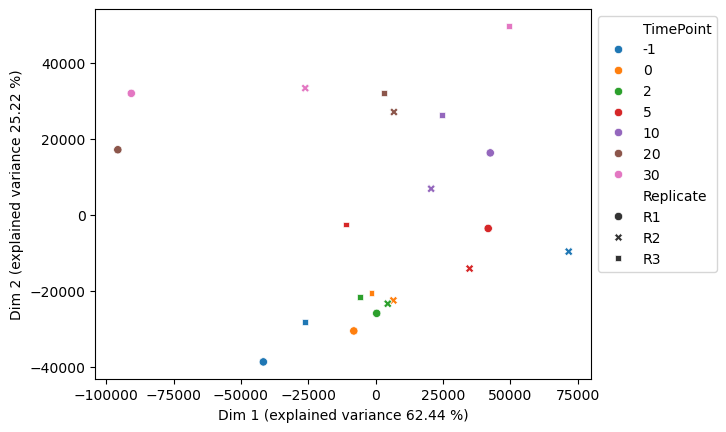

In [21]:
txPCA(tpms[columnOrder])

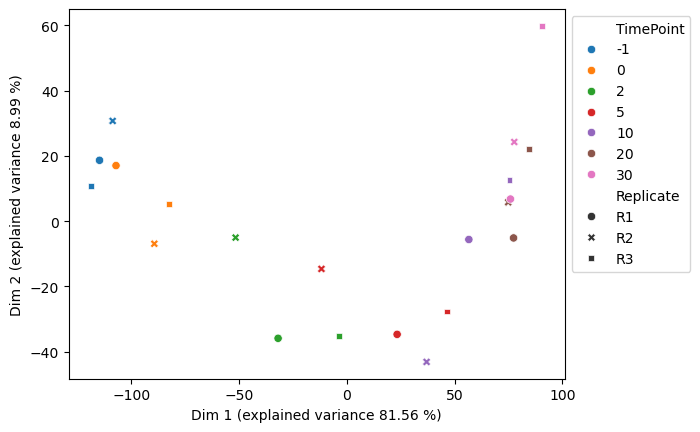

In [22]:
txPCA(logs[columnOrder])

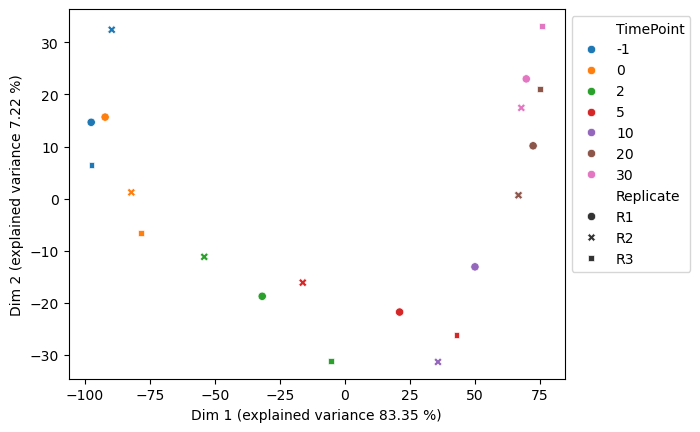

In [23]:
txPCA(logTPMs[columnOrder])

In [24]:
tpmHost = tpms[tpms['Entity'] == 'host']
tpmPhage = tpms[tpms['Entity'] == 'phage']
logTPMsHost = logTPMs[logTPMs['Entity'] == 'host']
logTPMsPhage = logTPMs[logTPMs['Entity'] == 'phage']

In [25]:
logTPMs

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,10_R2,10_R3,20_R1,20_R2,20_R3,30_R1,30_R2,30_R3,Entity,Symbol
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,7.416564,7.036888,7.098125,7.186223,7.424881,7.320286,7.092186,7.155917,7.029541,6.619751,...,6.706538,5.595799,5.607600,5.598772,5.394330,5.617091,5.707748,5.059658,host,folE2
gene-NWMN_RS14210,4.321732,3.357153,4.501322,4.314909,3.999461,4.419901,4.269656,4.371662,4.413688,3.961218,...,3.522489,3.893848,4.016962,3.318305,3.324241,3.774334,3.369336,3.655257,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.953714,0.835892,0.934592,0.912121,0.890011,1.111770,3.307905,2.723617,5.812390,7.463518,...,8.936433,10.878471,11.899422,11.046365,11.609253,11.176022,11.833997,11.354229,phage,tRNA-Phe
gene-NWMN_RS05825,1.694385,1.328337,2.195053,1.812464,1.663606,2.107077,1.879718,1.944391,2.301450,1.664788,...,1.680657,1.765169,1.490094,1.293244,1.877041,1.703234,0.615122,1.576346,host,gene-NWMN_RS05825
gene-NWMN_RS12715,8.139903,7.235702,8.317573,8.288090,7.801900,8.031833,7.928323,7.735982,8.145140,7.661967,...,7.004174,7.420693,7.987929,6.998063,7.526064,8.292552,7.525955,7.594566,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,3.671721,2.803439,3.783257,3.367354,3.828989,3.299697,3.992818,3.554129,3.239880,3.066195,...,3.891255,2.583580,2.648993,2.493338,2.436548,3.276792,3.245726,2.495610,host,gene-NWMN_RS14260
gene-NWMN_RS00015,7.329619,6.951365,7.902427,7.468482,7.612480,7.922042,7.239505,7.462030,7.614751,7.246411,...,6.985772,6.737685,6.112699,6.585626,6.388333,5.819366,6.216302,5.968484,host,yaaA
gene-NWMN_RS14870,3.043120,3.147167,3.306491,2.591937,2.840646,3.723973,1.914421,1.772023,3.135407,3.462867,...,5.196799,3.234532,2.533509,3.137502,2.260871,1.667609,2.517369,2.359579,host,gene-NWMN_RS14870


tpmHost

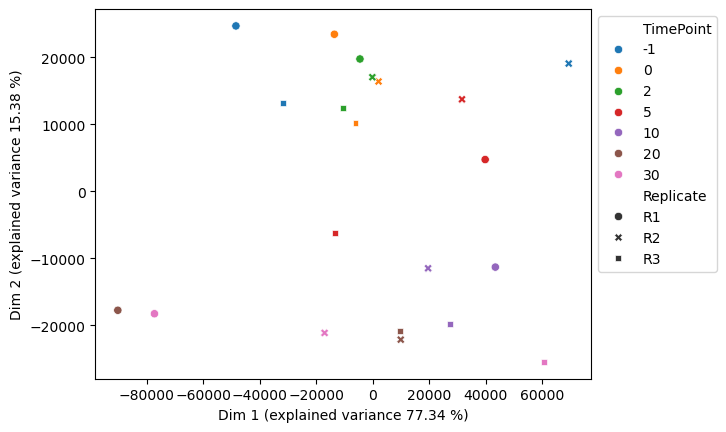

In [26]:
txPCA(tpmHost[columnOrder])

tpmPhage

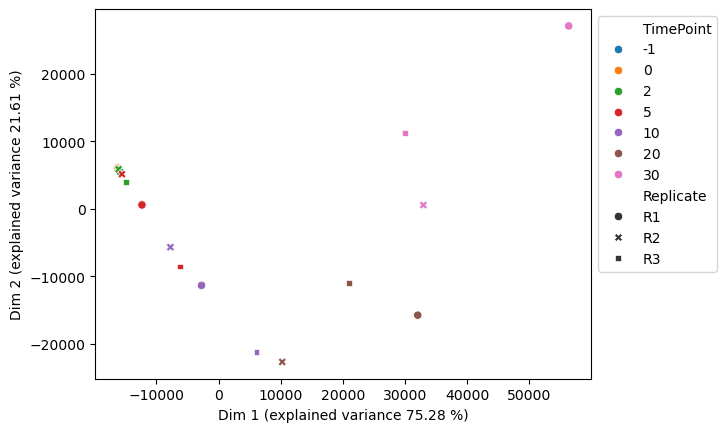

In [27]:
txPCA(tpmPhage[columnOrder])

logTPM Host

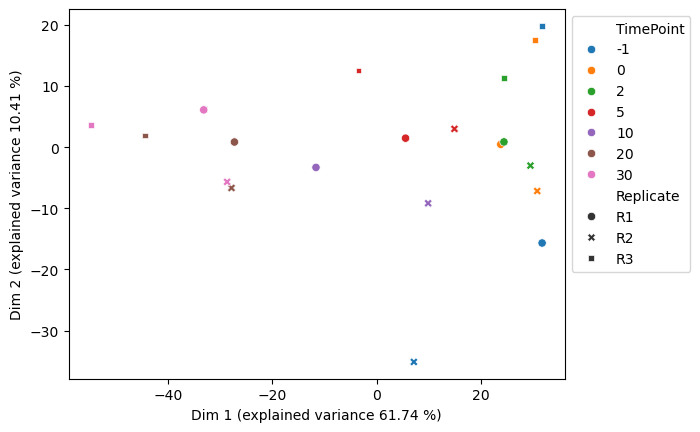

In [28]:
txPCA(logTPMsHost[columnOrder])

logTPM Phage

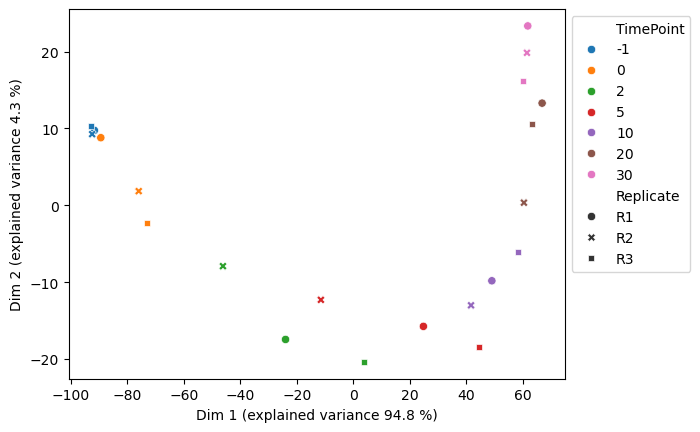

In [29]:
txPCA(logTPMsPhage[columnOrder])

$\rightarrow$ Replicates seem to be fine (not perfect, but no clear outliers detectable)

## 4. Final grouping

Summarize time points with mean and standard deviation for TPM-normalized data.

In [30]:
TPMmeans, TPMsds = getMeanSD(tpms[columnOrder])
TPMmeans = TPMmeans[['-1', '0', '2', '5', '10', '20', '30']]
TPMmeans[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]
TPMmeans

,-1,0,2,5,10,20,30,Entity,Symbol
Geneid,,,,,,,,,
gene-NWMN_RS03055,145.390387,158.096345,135.567477,98.278261,73.410292,45.426464,43.898680,host,folE2
gene-NWMN_RS14210,16.630870,18.100779,19.434396,14.214135,10.863694,11.060061,11.205479,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.877721,0.965369,23.234774,201.524112,1086.052253,3018.740149,2859.840197,phage,tRNA-Phe
gene-NWMN_RS05825,2.442195,2.662888,3.152771,2.567803,1.767121,1.977689,1.590041,host,gene-NWMN_RS05825
gene-NWMN_RS12715,249.607231,264.815952,245.624756,187.858827,158.666938,187.671542,229.379243,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,10.164299,10.459494,11.371318,7.436795,8.500644,4.772177,7.272389,host,gene-NWMN_RS14260
gene-NWMN_RS00015,173.623564,204.112890,173.479362,166.740419,115.625443,82.004142,63.479112,host,yaaA
gene-NWMN_RS14870,7.998474,7.802093,4.324057,9.540101,18.681112,5.460860,3.678151,host,gene-NWMN_RS14870


In [31]:
TPMsds = TPMsds[['-1', '0', '2', '5', '10', '20', '30']]
TPMsds[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]
TPMsds

,-1,0,2,5,10,20,30,Entity,Symbol
Geneid,,,,,,,,,
gene-NWMN_RS03055,17.449230,10.707898,4.883653,16.806327,23.066502,3.090912,8.268208,host,folE2
gene-NWMN_RS14210,5.332051,2.280828,0.848027,1.329597,2.313611,2.919807,1.395329,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.066413,0.138900,22.639917,122.262194,585.582257,700.084571,572.224725,phage,tRNA-Phe
gene-NWMN_RS05825,0.856682,0.477450,0.553554,0.662012,0.761160,0.513097,0.756693,host,gene-NWMN_RS05825
gene-NWMN_RS12715,72.227016,36.623661,28.619700,10.370421,22.366744,51.547090,58.924695,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,2.987434,1.955525,2.679455,0.802140,3.835753,0.364596,1.863522,host,gene-NWMN_RS14260
gene-NWMN_RS00015,48.147935,27.527410,18.372453,11.701392,8.176157,10.972422,7.418859,host,yaaA
gene-NWMN_RS14870,0.681121,3.153729,2.453094,3.783510,12.104513,1.703356,1.088831,host,gene-NWMN_RS14870


In [32]:
propExp = proportionalExp(TPMmeans[['-1', '0', '2', '5', '10', '20', '30']])
propExp[['Entity', 'Symbol']] = TPMmeans[['Entity', 'Symbol']]
propExp

,-1,0,2,5,10,20,30,Entity,Symbol
Geneid,,,,,,,,,
gene-NWMN_RS03055,0.919632,1.000000,0.857499,0.621635,0.464339,0.287334,0.277670,host,folE2
gene-NWMN_RS14210,0.855744,0.931379,1.000000,0.731391,0.558993,0.569097,0.576580,host,gene-NWMN_RS14210
gene-CPT_phageK_gt003,0.000291,0.000320,0.007697,0.066758,0.359770,1.000000,0.947362,phage,tRNA-Phe
gene-NWMN_RS05825,0.774618,0.844618,1.000000,0.814459,0.560498,0.627286,0.504331,host,gene-NWMN_RS05825
gene-NWMN_RS12715,0.942569,1.000000,0.927530,0.709394,0.599159,0.708687,0.866184,host,gene-NWMN_RS12715
...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,0.893854,0.919814,1.000000,0.653996,0.747551,0.419668,0.639538,host,gene-NWMN_RS14260
gene-NWMN_RS00015,0.850625,1.000000,0.849919,0.816903,0.566478,0.401759,0.311000,host,yaaA
gene-NWMN_RS14870,0.428158,0.417646,0.231467,0.510682,1.000000,0.292320,0.196891,host,gene-NWMN_RS14870


## 5. Phage gene classification

In [33]:
# Add a classification label based on exceeding 20 % of maximal expression

def classLabelThreshold(tpm):
    
    labels = list()
    
    i = 0
    while i < tpm.shape[0]:

        # Get array of expression values at time points
        expressions = list(tpm.iloc[i,0:(tpm.shape[1]-2)])

        # Get maximal value for each gene across time points
        maxTPM = max(expressions)

        # Get the threshold value
        thresHold = maxTPM*0.2

        # Subset expressions based on threshold
        filteredExpressions = [x for x in expressions if x >= thresHold]

        # Get index of time point
        indices = [expressions.index(x) for x in filteredExpressions]
        timePoint = min(indices)

        if timePoint == 0:
            labels.append('early')
        elif timePoint == 1:
            labels.append('early')
        elif timePoint == 2:
            labels.append('early')
        elif timePoint == 3:
            labels.append('early')
        elif timePoint == 4:
            labels.append('early')
        elif timePoint == 5:
            labels.append('middle')
        elif timePoint == 6:
            labels.append('late')

        i += 1

    tpmOut = tpm.copy()
    tpmOut['ClassThreshold'] = labels
    tpmOut.loc[tpmOut['Entity'] == 'host', 'ClassThreshold'] = 'None'

    return tpmOut

In [34]:
# Export fractional expressions with T=0.6 + Host/Phage Annotation for Orthofinder Analysis
# t = classLabelThreshold(propExp)
# t = t[t["Entity"] == "phage"]
# t["Host"] = "Staphyloccocus_aureus_Newman"
# t["Phage"] = "Staphylococcus_phage_K"
# t.to_csv("/ceph/ibmi/studenten/waffen/Cross_Analysis/Orthofinder_Clustering/Fractional_Expressions/T060/Finstrlova_Newman_fractional_expression_T=0.6.tsv", sep="\t")

In [35]:
# Add a classification label based on exceeding 20 % of maximal expression

def classLabelMax(tpm):
    
    labels = list()
    
    i = 0
    while i < tpm.shape[0]:

        # Get array of expression values at time points
        expressions = list(tpm.iloc[i,0:(tpm.shape[1]-3)])

        # Get maximal value for each gene across time points
        maxTPM = max(expressions)

        # Get the threshold value
        thresHold = maxTPM

        # Subset expressions based on threshold
        filteredExpressions = [x for x in expressions if x == thresHold]

        # Get index of time point
        indices = [expressions.index(x) for x in filteredExpressions]
        timePoint = min(indices)

        if timePoint == 0:
            labels.append('early')
        elif timePoint == 1:
            labels.append('early')
        elif timePoint == 2:
            labels.append('early')
        elif timePoint == 3:
            labels.append('early')
        elif timePoint == 4:
            labels.append('early')
        elif timePoint == 5:
            labels.append('middle')
        elif timePoint == 6:
            labels.append('late')

        i += 1

    tpmOut = tpm.copy()
    tpmOut['ClassMax'] = labels
    tpmOut.loc[tpmOut['Entity'] == 'host', 'ClassMax'] = 'None'

    return tpmOut

In [36]:
TPMmeans = classLabelThreshold(TPMmeans)
TPMmeans = classLabelMax(TPMmeans)

In [37]:
TPMmeans

,-1,0,2,5,10,20,30,Entity,Symbol,ClassThreshold,ClassMax
Geneid,,,,,,,,,,,
gene-NWMN_RS03055,145.390387,158.096345,135.567477,98.278261,73.410292,45.426464,43.898680,host,folE2,None,None
gene-NWMN_RS14210,16.630870,18.100779,19.434396,14.214135,10.863694,11.060061,11.205479,host,gene-NWMN_RS14210,None,None
gene-CPT_phageK_gt003,0.877721,0.965369,23.234774,201.524112,1086.052253,3018.740149,2859.840197,phage,tRNA-Phe,early,middle
gene-NWMN_RS05825,2.442195,2.662888,3.152771,2.567803,1.767121,1.977689,1.590041,host,gene-NWMN_RS05825,None,None
gene-NWMN_RS12715,249.607231,264.815952,245.624756,187.858827,158.666938,187.671542,229.379243,host,gene-NWMN_RS12715,None,None
...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,10.164299,10.459494,11.371318,7.436795,8.500644,4.772177,7.272389,host,gene-NWMN_RS14260,None,None
gene-NWMN_RS00015,173.623564,204.112890,173.479362,166.740419,115.625443,82.004142,63.479112,host,yaaA,None,None
gene-NWMN_RS14870,7.998474,7.802093,4.324057,9.540101,18.681112,5.460860,3.678151,host,gene-NWMN_RS14870,None,None


In [38]:
TPMmeans[TPMmeans['Entity'] == 'phage']['ClassMax'].value_counts()

ClassMax
middle    114
late       62
early      61
Name: count, dtype: int64

Add classes to other dfs.

In [39]:
TPMsds[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
tpms[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
logs[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
propExp[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]

# gff3
gff3_final = gff3_genes.merge(TPMmeans[["ClassThreshold", "ClassMax"]], right_index=True, left_on="ID", how="left")
gff3_host  = gff3_final[gff3_final['seq_id'] == 'NC_009641.1']
gff3_phage = gff3_final[gff3_final['seq_id'] == 'NC_005880.2']

## 6. Add variance to all dataframes

Base variance call on tpms.

In [40]:
def stabilizedVariance(df):
    labels = list()
    
    i = 0
    while i < df.shape[0]:

        # Get array of expression values at time points
        expressions = list(df.iloc[i,0:(df.shape[1]-4)])

        # Get mean expression for the gene
        exprMean = np.mean(np.array(expressions))

        # Get the variance for the gene
        varGene = np.var(np.array(expressions))

        # Stabilized variance
        stableVarGene = varGene/exprMean

        labels.append(stableVarGene)

        i += 1

    tpmOut = df.copy()
    tpmOut['Variance'] = labels

    return tpmOut

In [41]:
tpms = stabilizedVariance(tpms)
tpms

SampleNames,-1_R1,-1_R2,-1_R3,0_R1,0_R2,0_R3,2_R1,2_R2,2_R3,5_R1,...,20_R2,20_R3,30_R1,30_R2,30_R3,Entity,Symbol,ClassThreshold,ClassMax,Variance
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NWMN_RS03055,169.847386,130.314988,136.008787,144.635975,170.835061,158.818000,135.445936,141.608551,129.647946,97.343015,...,47.461662,41.058629,48.080947,51.264098,32.350994,host,folE2,None,None,21.242998
gene-NWMN_RS14210,18.997284,9.247162,21.648164,18.902937,14.994026,20.405375,18.288322,19.701475,20.313392,14.575620,...,8.974915,9.016045,12.683199,9.334067,11.599170,host,gene-NWMN_RS14210,None,None,1.278610
gene-CPT_phageK_gt003,0.936852,0.784960,0.911349,0.881810,0.853190,1.161107,8.903272,5.605267,55.195782,175.499223,...,2113.886545,3123.161812,2312.758014,3649.799257,2616.963320,phage,tRNA-Phe,early,middle,1710.467675
gene-NWMN_RS05825,2.236389,1.511131,3.579065,2.512416,2.168075,3.308174,2.680032,2.848753,3.929530,2.170672,...,1.450786,2.673209,2.256300,0.531687,1.982137,host,gene-NWMN_RS05825,None,None,0.307167
gene-NWMN_RS12715,281.068792,149.717432,318.035469,311.581827,222.154696,260.711333,242.591940,212.187876,282.094453,201.526535,...,126.828229,183.319328,312.550019,183.305428,192.282281,host,gene-NWMN_RS12715,None,None,15.453570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-NWMN_RS14260,11.743775,5.981026,12.768097,9.319875,13.211520,8.847086,14.920543,10.746259,8.447153,7.375615,...,4.630792,4.413449,8.691983,8.485516,4.639668,host,gene-NWMN_RS14260,None,None,1.171212
gene-NWMN_RS00015,159.855191,122.756913,238.258590,176.107584,194.697289,241.533797,150.115215,175.317249,195.005623,150.840322,...,95.044172,82.768309,55.468176,73.352108,61.617052,host,yaaA,None,None,21.124870
gene-NWMN_RS14870,7.242714,7.859141,8.893568,5.029075,6.163410,12.213794,2.769626,2.415325,7.787219,10.026227,...,7.799989,3.792807,2.176876,4.725371,4.132204,host,gene-NWMN_RS14870,None,None,5.847962


In [42]:
logs['Variance'] = tpms['Variance']
TPMmeans['Variance'] = tpms['Variance']
TPMsds['Variance'] = tpms['Variance']
propExp['Variance'] = tpms['Variance']

## 7. Write data to output

In [43]:
df_norRNAs[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]


In [44]:
# Full TPM table
tpms.to_csv('Finstrlova_Newman_full_TPM.tsv', sep = '\t')
# Full raw_counts table
df_norRNAs.to_csv('Finstrlova_Newman_full_raw_counts.tsv', sep = '\t')
# Summarized (time point means) TPM table
TPMmeans.to_csv('Finstrlova_Newman_TPM_means.tsv', sep = '\t')
# Summarized (time point) TPM standard deviation
TPMsds.to_csv('Finstrlova_Newman_TPM_std.tsv', sep = '\t')
# Proportional expression per gene and time point
propExp.to_csv('Finstrlova_Newman_fractional_expression.tsv', sep = '\t')
# Processed gff3 file
gff3_host.to_csv('Finstrlova_Newman_host_gff3.tsv', sep='\t')
gff3_phage.to_csv('Finstrlova_Newman_phage_gff3.tsv', sep='\t')